# **Fintech Performance Analysis | Part 2**

# Essential Visualization

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/df_merged (1).csv'

# Load the CSV file into a DataFrame
df_merged = pd.read_csv(file_path)

# Unable column limitation views
pd.set_option('display.max_columns', None)

df_merged.head()

<ipython-input-7-cb900e6797eb>:8: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(file_path)


,customer_id,emp_title,emp_length,home_ownership,annual_inc,verification_status,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,zip_code,state,region,funded_amount,term,int_rate,installment,grade,issue_month,issue_year,payment_plan,type,purpose,description
0,B'\xa0\xe6\x1a\xc8h\xbd/(t]\x13[\xf5\x0fk\xd9\...,Unknown,Unknown,Rent,25000.0,Verified,6864.0,34322.0,47207,Fully paid,6025.0,010xx,MA,Northeast,6025.0,36 months,0.1599,211.80000,C,April,2017.0,False,Individual,Credit_card,Credit card refinancing
1,B'c\xe3s\xf0yy7\xba\xda\x16jf\xec\xbe\xc0my\xd...,Unknown,Unknown,Mortgage,50000.0,Not verified,3418.0,23927.0,47190,Current,6025.0,010xx,MA,Northeast,6025.0,36 months,0.1505,209.00999,C,November,2017.0,False,Individual,Home_improvement,Home improvement
2,B'1\xe3ud\xe4\x13\x1f\x80\x1d\xb1\xa5\x14x\xac...,Care giver,Unknown,Own,46800.0,Verified,48173.0,240865.0,116454,Fully paid,12000.0,010xx,MA,Northeast,12000.0,36 months,0.0649,367.73999,A,December,2014.0,False,Individual,Debt_consolidation,Debt consolidation
3,B'bb\xf1y\x00\xaf\x96\x85\x16\xaf\xb4z\x1c\xa0...,Unknown,Unknown,Own,65000.0,Verified,2587.0,46567.0,149201,Current,15000.0,010xx,MA,Northeast,15000.0,36 months,0.0980,482.60999,B,January,2016.0,False,Individual,Credit_card,Credit card refinancing
4,B'\xaazf\x84\x93\xa0w\xb5g\xed0\xd0\xd4\xd4\xc...,Unknown,Unknown,Own,49200.0,Source verified,738.0,5903.0,84884,Current,10000.0,010xx,MA,Northeast,10000.0,36 months,0.0721,309.73999,A,September,2018.0,False,Individual,Credit_card,Credit card refinancing


## **Loan Count Growth Over Time** / **Year-over-Year Loan Count Growth***

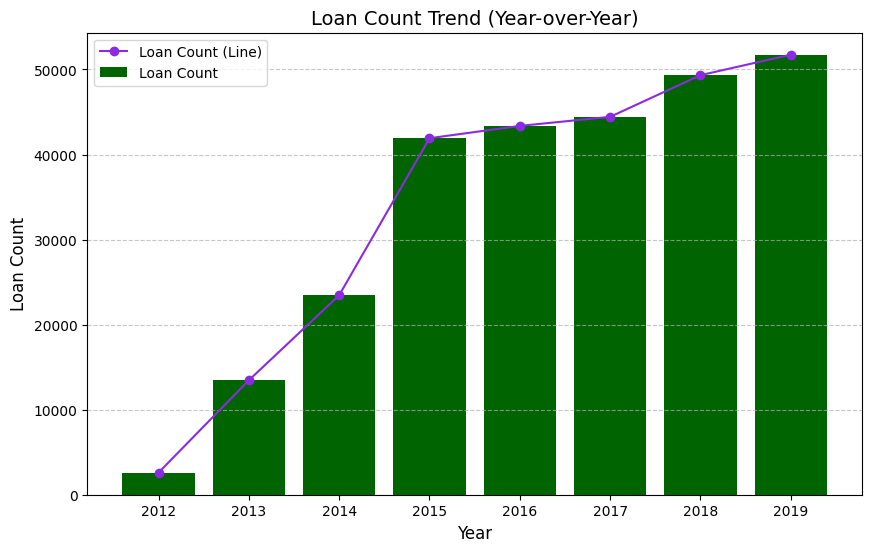

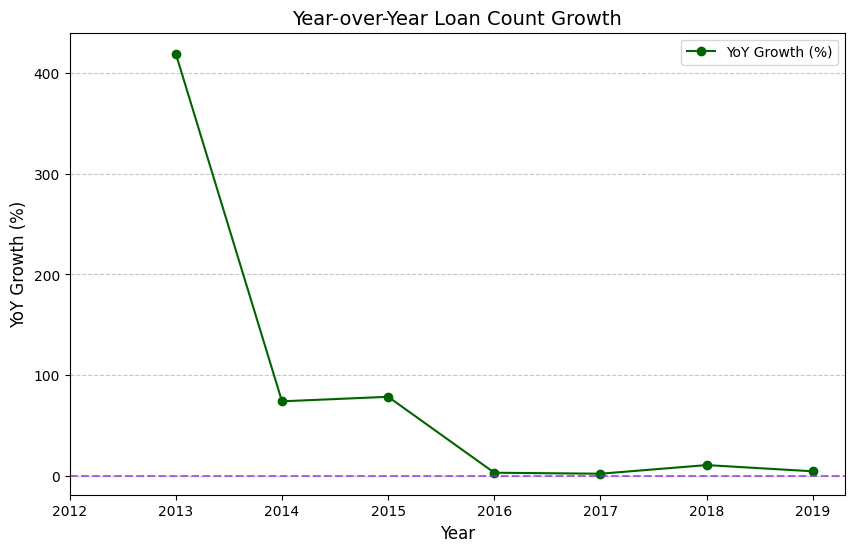

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loan count data
data = {
    'issue_year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'loan_count': [2594, 13460, 23453, 41919, 43368, 44435, 49333, 51737]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate year-over-year growth percentage
df['previous_year_count'] = df['loan_count'].shift(1)
df['yoy_growth_percentage'] = ((df['loan_count'] - df['previous_year_count']) / df['previous_year_count']) * 100

# Define colors
dark_green = "#006400"
violet = "#8A2BE2"

# Plot the loan count trend
plt.figure(figsize=(10, 6))
plt.bar(df['issue_year'], df['loan_count'], color=dark_green, label='Loan Count')
plt.plot(df['issue_year'], df['loan_count'], color=violet, marker='o', label='Loan Count (Line)')
plt.title('Loan Count Trend (Year-over-Year)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Loan Count', fontsize=12)
plt.xticks(df['issue_year'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the YoY growth percentage
plt.figure(figsize=(10, 6))
plt.plot(df['issue_year'], df['yoy_growth_percentage'], color=dark_green, marker='o', label='YoY Growth (%)')
plt.axhline(0, color=violet, linestyle='--', alpha=0.7)
plt.title('Year-over-Year Loan Count Growth', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Growth (%)', fontsize=12)
plt.xticks(df['issue_year'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Loan Count Growth Over Time**

- The number of loans issued grew rapidly between 2012 and 2015, as shown by the green bars. Growth stabilized after 2015, with loan counts remaining consistent through 2019.

- The market experienced an initial expansion phase but reached maturity by 2016, with no significant increase in loan issuance thereafter.

**Year-over-Year Loan Count Growth**

- The percentage growth in loans issued year-over-year (YoY) peaked at over 400% in 2013 but dropped sharply in subsequent years.

- The decline in growth rates reflects a shift from rapid expansion to market stabilization. After 2016, YoY growth was negligible.

## **Distribution of Loan Amounts**

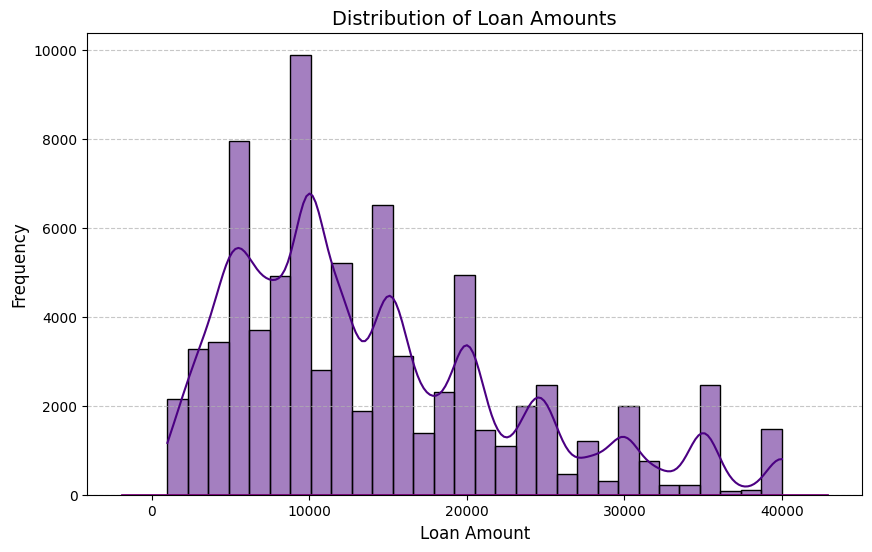

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define dark violet color
dark_violet = "#4B0082"

# Visualization: Loan Amount Distribution
plt.figure(figsize=(10, 6))

# Histogram with dark violet color
sns.histplot(df_merged['loan_amount'], bins=30, kde=True, color=dark_violet)

# KDE (Kernel Density Estimation) curve in a slightly lighter violet for contrast
sns.kdeplot(df_merged['loan_amount'], color="#800080", linewidth=2)  # Purple

# Chart title and labels
plt.title('Distribution of Loan Amounts', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



**Distribution of Loan Amounts**

- Most loans are concentrated in smaller amounts ranging from $5,000 to $15,000. Larger loans above $30,000 are less frequent.

- Borrowers predominantly seek mid-sized loans, suggesting demand is focused on manageable loan amounts rather than large-scale financing

## **Loan Status Proportion**

<ipython-input-12-3b1eac32661c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette=custom_palette)
<ipython-input-12-3b1eac32661c>:13: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette=custom_palette)


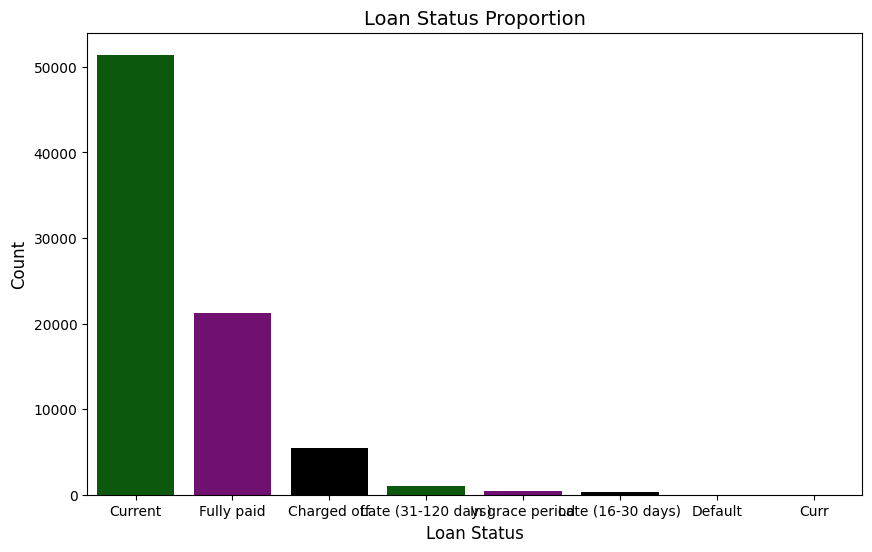

In [12]:
# Visualization 3:  Loans Status Proportion



# dataframe
loan_status_counts = df_merged['loan_status'].value_counts()

# Custom color palette
custom_palette = ['#006400', '#800080', '#000000']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette=custom_palette)

# Title and labels
plt.title('Loan Status Proportion', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


**Loan Status Proportion**

- The majority of loans are categorized as "Current," indicating borrowers are actively paying on time. A significant portion is "Fully Paid," while smaller proportions fall into "Charged Off" (defaulted) or other delinquent statuses.

- Loan performance is strong overall, with most borrowers meeting their obligations. Default rates remain relatively low.

## **Loan Amount vs. Interest Rate**

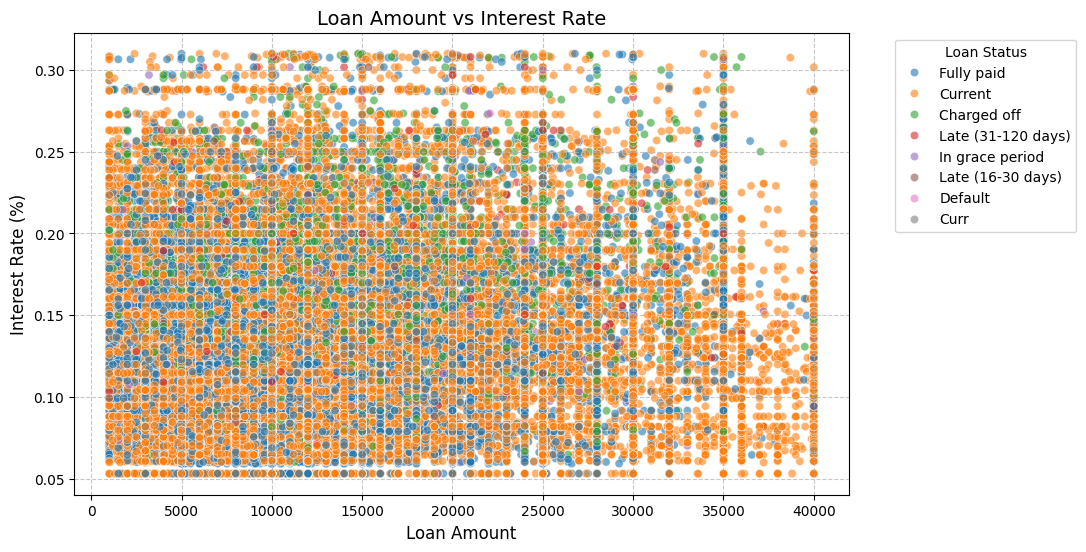

In [13]:
# Visualization 4:  Relationship Between Loan Amount and Interest Rate

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='loan_amount', y='int_rate', hue='loan_status', alpha=0.6)
plt.title('Loan Amount vs Interest Rate', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Loan Amount vs. Interest Rate**

- Interest rates vary widely across all loan amounts but cluster between 10% and 30%. Loans with different statuses (e.g., "Fully Paid," "Current," or "Charged Off") are distributed across the range of loan amounts and interest rates.

- There is no clear correlation between loan amount or interest rate and loan performance, suggesting other factors may influence repayment outcomes.

## **Correlation Heatmap**

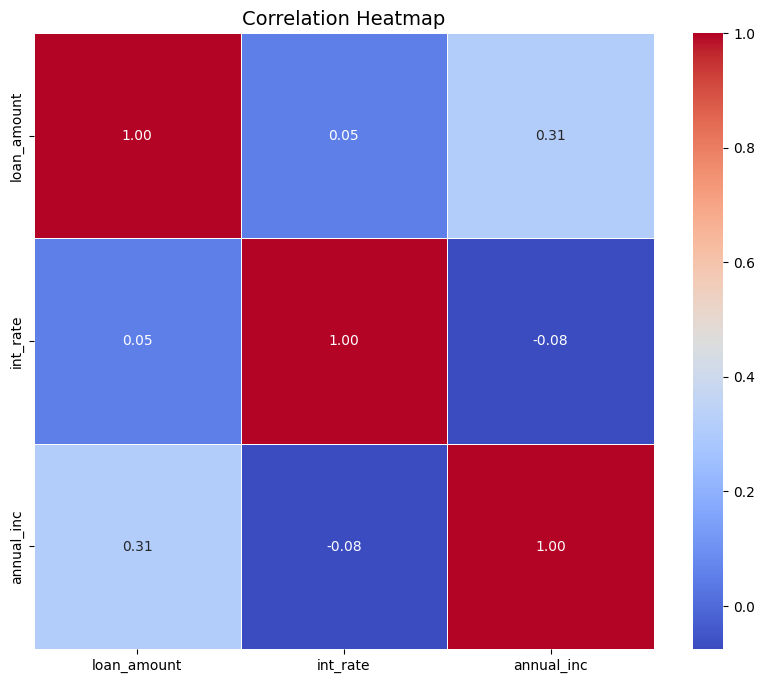

In [16]:


# Create the figure for the heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_merged[['loan_amount', 'int_rate', 'annual_inc']].corr()

# Create the heatmap with annotations and a custom color palette
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=14)

# Show the heatmap
plt.show()

**Correlation Heatmap**

This heatmap shows the Correlations between three variables: loan_amount, int_rate (interest rate), and annual_inc (annual income). Key observations are as follows:

- Loan Amount and Annual Income: A moderate positive correlation ( r = 0.31 r=0.31) suggests that individuals with higher annual incomes tend to request larger loan amounts.

- Loan Amount and Interest Rate: A very weak positive correlation ( r = 0.05 r=0.05) indicates almost no relationship between the loan amount and the interest rate.

- Annual Income and Interest Rate: A weak negative correlation ( r = − 0.08
r=−0.08) implies that individuals with higher annual incomes might receive slightly lower interest rates, though the relationship is negligible.

## **Loan Amount Distribution by Purpose**

<ipython-input-17-8fdf7b2eb0a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='purpose', y='loan_amount', palette='Set3')


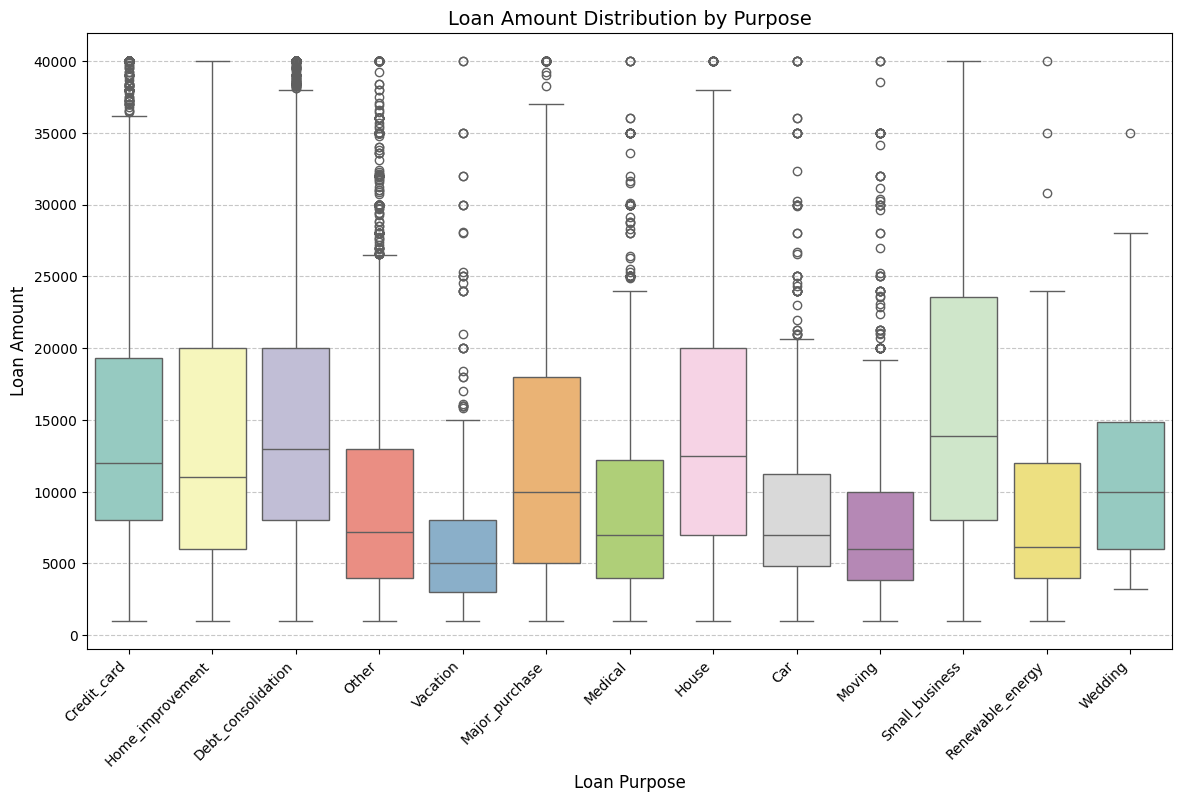

In [17]:
# Visualization 6: Loan Amount Distribution by Purpose

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_merged, x='purpose', y='loan_amount', palette='Set3')
plt.title('Loan Amount Distribution by Purpose', fontsize=14)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Loan Amount Distribution by Purpose**


- **Highest Loan Amounts:** Categories such as House and Small Business exhibit the highest median loan amounts, with significant variability.

- **Lowest Loan Amounts:** Purposes like Vacation and Moving have lower median loan amounts, indicating these are typically for smaller financial needs.

- **Outliers:** Most categories show a substantial number of outliers, particularly in Debt Consolidation, Home Improvement, and Medical. This suggests that while typical loans for these purposes fall within a certain range, there are instances of exceptionally high loan requests.

- **Consistency Across Categories:** Categories like Vacation and Renewable Energy show narrower interquartile ranges (IQRs), indicating more consistent loan amounts.